

# Sentiment Based Product Recommendation System



## Problem Statement:

To build a sentiment-based product recommendation system, which includes the following tasks.
Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model(integrate sentiment with recommendation systems )
Deploying the end-to-end project with a user interface


## Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

from wordcloud import WordCloud, STOPWORDS

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Task 1:

#### Data Cleaning and Pre-Processing

### 1.1 : Reading & Loading data set


In [7]:
# reading the data
classification_df = pd.read_csv("sample30.csv", sep=',')
classification_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


###### Keeping separate copy of this for recommendation model 

In [8]:
recommendation_df = classification_df.copy()

### 1.2 : Analyzing The data set

In [9]:
classification_df.shape

(30000, 15)

In [10]:
#data overivew
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

### 1.3 : Data Quality check

<b> Finding percentage of missing values. <b>

In [11]:
#Null precentage
print("Percentage of missing values :")
null_info = classification_df.isna().sum() / len(classification_df) * 100
null_info.sort_values(ascending = False).head(50).round(4)

Percentage of missing values :


reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
reviews_text             0.0000
reviews_rating           0.0000
name                     0.0000
categories               0.0000
brand                    0.0000
id                       0.0000
dtype: float64

In [12]:
print("Missing Value Count :")
print(classification_df.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


##  1.4: Exploratory Data Analytics

In [13]:
# Drop the columns with less than 20% of values
missing_val_threshold = len(classification_df) * .2
classification_df.dropna(thresh = missing_val_threshold, axis = 1, inplace = True)
print("Percentage of missing values :")
print(classification_df.isna().mean().round(4) * 100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.21
user_sentiment          0.00
dtype: float64


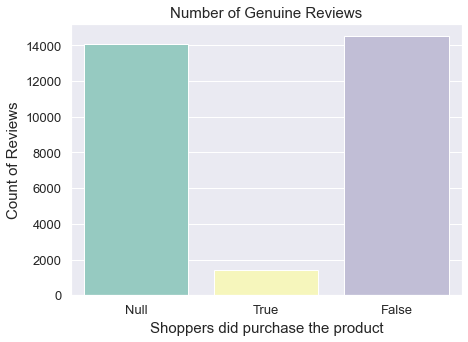

In [14]:
#on the reviews_didpurchase column, replace null values with "Null"
classification_df['reviews_didPurchase'].fillna('Null', inplace=True)

#checking distribution of reviews_didpurchased

plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(classification_df['reviews_didPurchase'],palette="Set3")
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=15)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=15)
ax.axes.set_title('Number of Genuine Reviews', fontsize=15)
ax.tick_params(labelsize=13)
plt.show()



In [15]:
classification_df['reviews_didPurchase'].value_counts()

False    14498
Null     14068
True      1434
Name: reviews_didPurchase, dtype: int64

A very low number of customers who purchased and gave review are present in the dataset.

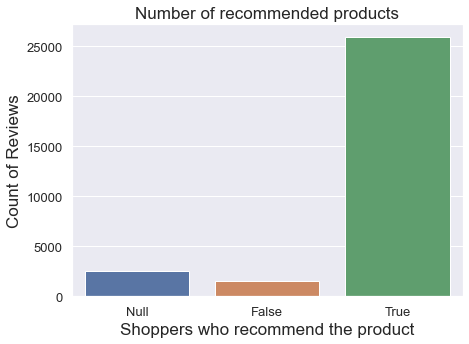

True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

In [17]:
#on the reviews_doRecommend column, replace null values with "Null"
classification_df['reviews_doRecommend'].fillna('Null', inplace=True)
#checking distribution of reviews_didpurchased

plt.figure(figsize=(7,5))
ax = sns.countplot(classification_df['reviews_doRecommend'])
ax.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of recommended products', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()
classification_df['reviews_doRecommend'].value_counts()

We can see most of the users recommend the productby putting reviews

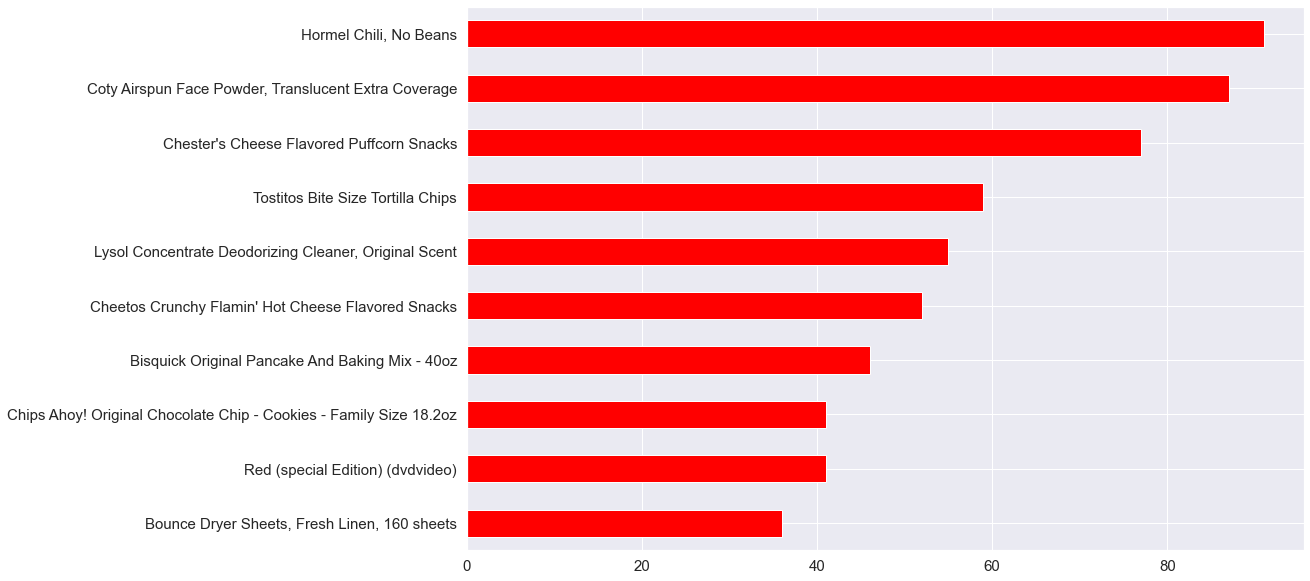

In [18]:
#Checking top 10 most purchased product
result = classification_df[classification_df['reviews_didPurchase'] == True]
#ax.set_color(['red', 'black', 'yellow'])
result['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[15,10], fontsize=15,color='Red').invert_yaxis()

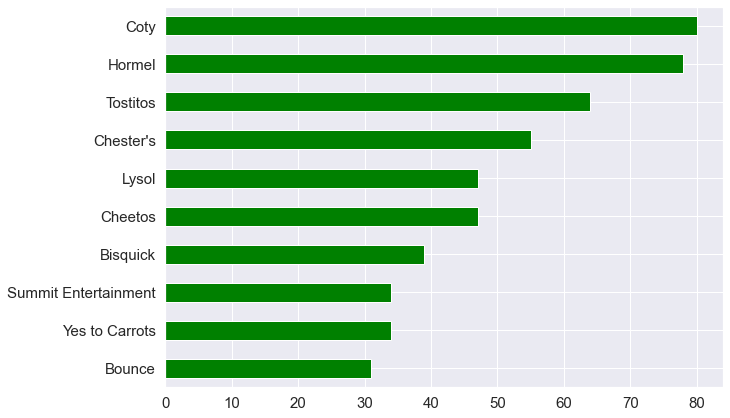

In [19]:
#Checking top 10 most trusted brands based on the positive review
#from matplotlib import cm
result = classification_df[(classification_df['reviews_didPurchase'] == True) & (classification_df.user_sentiment=="Positive")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,7], fontsize=15,color='Green').invert_yaxis()

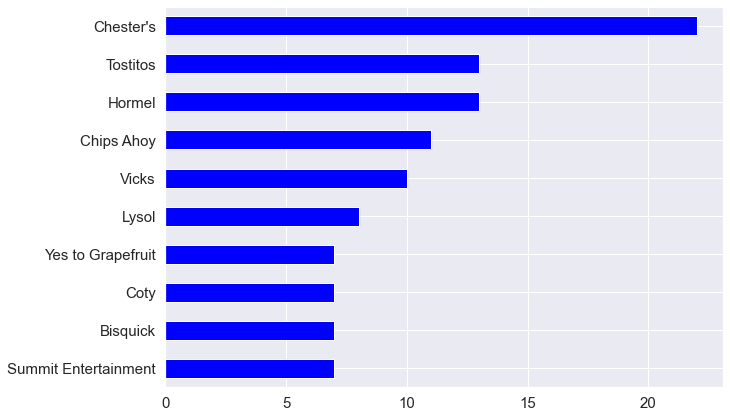

In [20]:
#Checking top 10 most badly rated brands based on the negative review
#from matplotlib import cm
result = classification_df[(classification_df['reviews_didPurchase'] == True) & (classification_df.user_sentiment=="Negative")]
result['brand'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,7], fontsize=15,color='Blue').invert_yaxis()

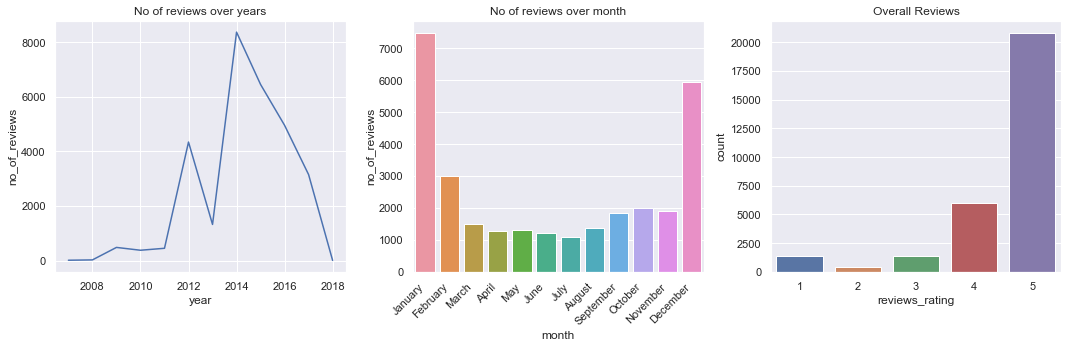

In [21]:
#--- split the date into seperate columns of date month and year

classification_df['reviews_onlydate'] = classification_df['reviews_date'].str[:10]
classification_df['reviews_onlydate'].head()

#--- split the date into seperate columns of date month and year

classification_df['reviews_onlydate'] = pd.to_datetime(classification_df['reviews_onlydate'], errors='coerce').dt.date
classification_df['reviews_onlydate'].fillna(classification_df['reviews_onlydate'].value_counts().idxmax(),inplace=True)
classification_df['reviews_onlydate'] = pd.to_datetime(classification_df.reviews_onlydate, format='%Y-%m-%d')
classification_df['reviews_onlydate'].head()

#--- split the date into seperate columns of date month and year

classification_df['month'] = classification_df['reviews_onlydate'].dt.month
classification_df['year'] = classification_df['reviews_onlydate'].dt.year
f, axes = plt.subplots(1,3, figsize=(15,5))

#--- Yearly Reviews
yearly = classification_df.groupby(['year'])['reviews_username'].count().reset_index()
yearly = yearly.rename(columns={'reviews_username':'no_of_reviews'})
yearChart = sns.lineplot(x='year',y='no_of_reviews',data=yearly, ax = axes[0])
yearChart.set_title('No of reviews over years')

#--- Monthly Reviews
monthly = classification_df.groupby(['month'])['reviews_username'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviews_username':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[1])
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#-- Getting overall ratings for all products
sns.countplot(x = 'reviews_rating', data = classification_df, ax = axes[2] ).set_title('Overall Reviews')

f.tight_layout()

***Rating Trend over the years***
- The number of reviews started to fall from 2014 onwards
- January and December month has high number of reviews

***Distribution of overall ratings***
- A review of 5 seems most common among customers


In [22]:
#--- ratings distribution with product id
ratings=pd.DataFrame(classification_df.groupby('id')['reviews_rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(classification_df.groupby('id')['reviews_rating'].count())
ratings.head()

,reviews_rating,Number_Of_Ratings
id,,
AV13O1A8GV-KLJ3akUyj,5.000000,1
AV14LG0R-jtxr-f38QfS,5.000000,2
AV16khLE-jtxr-f38VFn,2.518519,27
AV1YGDqsGV-KLJ3adc-O,4.129310,348
AV1YIch7GV-KLJ3addeG,5.000000,1


Looks like there are few products with very few ratings received.

Let's now check the distribution of count of ratings and the mean ratings

Text(0.5, 1.0, 'Distribution of Ratings')

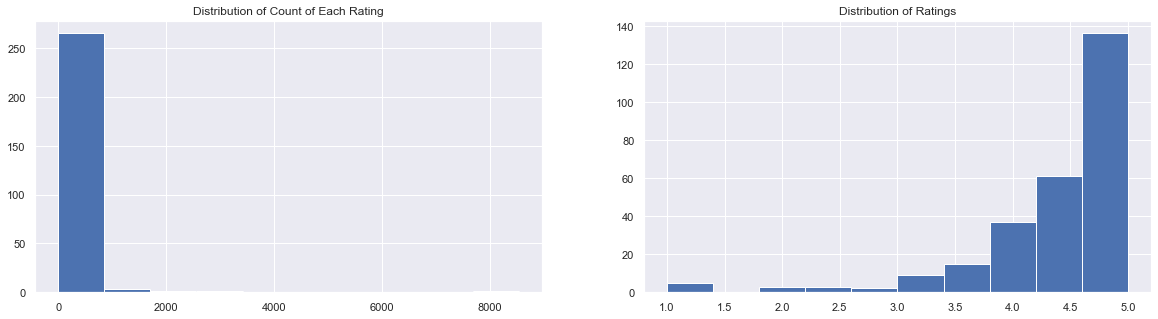

In [23]:
#distribution of count of ratings and mean ratings
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings)
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.reviews_rating)
plt.title('Distribution of Ratings')

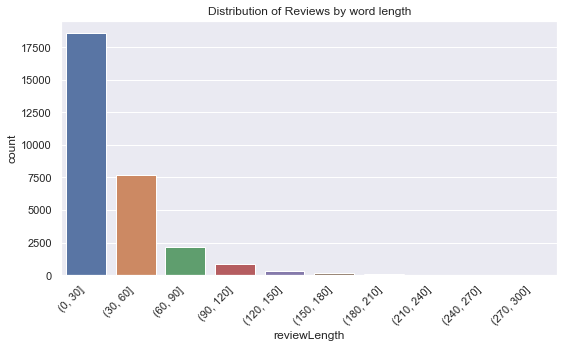

In [25]:
#---- Distribution of word reviews by length

f = plt.figure(figsize=(8,5))
df_reviews = classification_df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLength'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_word_length = df_reviews.groupby(pd.cut(df_reviews.reviewLength, np.arange(0,330,30))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length)
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

This clearly shows users don't like spend musch time describing the reviews and thus we have more short reviews

## Task 2.  Text Pre-processing

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english') #All the stopwords in English language
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aakis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [27]:
# checking duplicates
duplicates = classification_df[classification_df.duplicated(subset={"reviews_username","id"})]
duplicates.reviews_username.value_counts()

byamazon customer    39
mike                 24
chris                19
tony                  7
movielover            6
                     ..
uu1622                1
ecyoung105            1
meli                  1
cleansmells           1
veroo                 1
Name: reviews_username, Length: 2116, dtype: int64

Same user giving review for same product multiple times leads to duplication

In [28]:
# Example of above analysis
classification_df[classification_df['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_onlydate,month,year
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,byamazon customer,Positive,2016-02-03,2,2016
16799,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-01-07T00:00:00.000Z,Null,Null,4,"Good but if you like it, get it in quantity",Yum,byamazon customer,Positive,2017-01-07,1,2017
16807,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-08-19T00:00:00.000Z,Null,Null,4,RICE LOOKS GOOD.,RICE IS FINE,byamazon customer,Positive,2015-08-19,8,2015
16812,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-04-08T00:00:00.000Z,Null,Null,4,I love the zip lock seal on these bags (unique...,I love the zip lock seal on these bags (unique...,byamazon customer,Positive,2015-04-08,4,2015
16824,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2011-07-20T00:00:00.000Z,Null,Null,4,Lundberg Jubilee is a blend of sweet brown ric...,Beautiful and High-Quality Rice But Too Much S...,byamazon customer,Positive,2011-07-20,7,2011
16841,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-06-05T00:00:00.000Z,Null,Null,5,This takes much longer to cook but the taste i...,Happy,byamazon customer,Positive,2017-06-05,6,2017
16850,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-04-20T00:00:00.000Z,Null,Null,5,Great rice in a small package...I'll be buying...,Recommended,byamazon customer,Positive,2017-04-20,4,2017
16904,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-07-03T00:00:00.000Z,Null,Null,5,Very tasty! Very earthy rice great for breakfa...,Lindberg is just the best!,byamazon customer,Positive,2016-07-03,7,2016
16920,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-06-23T00:00:00.000Z,Null,Null,5,It was great. Very convenient in the 1 lb bags.,Five Stars,byamazon customer,Positive,2016-06-23,6,2016
16929,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-20T00:00:00.000Z,Null,Null,5,Good rice.,Five Stars,byamazon customer,Positive,2016-02-20,2,2016


In [29]:
#--average ratings
classification_df['avg_ratings'] = classification_df.groupby(['id','reviews_username'])['reviews_rating'].transform('mean')
classification_df['avg_ratings']=classification_df['avg_ratings'].round(2)
classification_df[['id','reviews_username','reviews_rating','avg_ratings']]

,id,reviews_username,reviews_rating,avg_ratings
0,AV13O1A8GV-KLJ3akUyj,joshua,5,5.0
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
3,AV16khLE-jtxr-f38VFn,rebecca,1,1.0
4,AV16khLE-jtxr-f38VFn,walker557,1,1.0
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,laurasnchz,5,5.0
29996,AVpfW8y_LJeJML437ySW,scarlepadilla,5,5.0
29997,AVpfW8y_LJeJML437ySW,liviasuexo,5,5.0
29998,AVpfW8y_LJeJML437ySW,ktreed95,5,5.0


In [30]:
#Deleting all the duplicates
df_final =  classification_df.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [32]:
size_diff = df_final['id'].size/classification_df['id'].size
print("%.1f %% data loss"%((1-size_diff)*100))
print("Currnet size : ",df_final['id'].size," rows ")


8.0 % data loss
Currnet size :  27605  rows 


In [33]:
#Verification
df_final[df_final['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,byamazon customer,Positive,2016-02-03,2,2016,4.58
26450,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2017-07-05T00:00:00.000Z,Null,Null,1,"The first time I used in my infant, he rubbed ...",Not Tear Free Not Useful,byamazon customer,Positive,2017-07-05,7,2017,3.41


In [34]:
df_final["avg_ratings"].mean()

4.522550384225026

The average rating given by user is : 4.5

- As the review is mostly text data, we will clean the data for further analysis

In [35]:
#concatenate user_text and user_title
# Filling missing values in Reviews title with blank space
df_final['reviews_title'] = df_final['reviews_title'].fillna('')
df_final['user_reviews'] = df_final[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')
df_final[['reviews_title','reviews_text','user_reviews']]

,reviews_title,reviews_text,user_reviews
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome. i love this album. it's very goo...
1,Good,Good flavor. This review was collected as part...,Good. Good flavor. This review was collected a...
3,Disappointed,I read through the reviews on here before look...,Disappointed. I read through the reviews on he...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation. My husband bought this gel for us....
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it. My boyfriend and I bought this t...
...,...,...,...
29995,Softness!!,I got this conditioner with Influenster to try...,Softness!!. I got this conditioner with Influe...
29996,I love it,"I love it , I received this for review purpose...","I love it. I love it , I received this for rev..."
29997,Hair is so smooth after use,First of all I love the smell of this product....,Hair is so smooth after use. First of all I lo...
29998,Perfect for my oily hair!,I received this through Influenster and will n...,Perfect for my oily hair!. I received this thr...


In [36]:
#--- HTML Tag Removal
import re
########Function to remove html tags from data
def trim_html(data):
    p = re.compile('<.*?>')#Find this kind of pattern
    return p.sub('',data) 

#--- Punctuation removal
########Function to remove All the punctuations from the text
def trim_punct(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)


In [37]:
snow = SnowballStemmer('english') #initialising the snowball stemmer

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [38]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(snow.stem(word)) # stem the word if no lemma is obtaines
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [39]:
#pre-processing output for one Review
def preprocessText(text, stem=False):
  
    text=text.lower() #--- transform to lower case
    text = trim_html(text) #--- remove HTML Tags
    text = trim_punct(text) #--- remove Punctuation
    return lemmatize_sentence(text)


In [41]:
df_main = df_final.copy(deep = True)
df_main['Review'] = df_main['user_reviews'].map(preprocessText)
df_main.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,Review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012-11-30,11,2012,5.0,Just Awesome. i love this album. it's very goo...,just awesome i love this album it very good mo...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017-07-09,7,2017,5.0,Good. Good flavor. This review was collected a...,good good flavor this review be collect as par...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,2016-01-06,1,2016,1.0,Disappointed. I read through the reviews on he...,disappointed i read through the review on here...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,2016-12-21,12,2016,1.0,Irritation. My husband bought this gel for us....,irritation my husband buy this gel for us the ...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative,2016-04-20,4,2016,1.0,Not worth it. My boyfriend and I bought this t...,not worth it my boyfriend and i buy this to sp...


#### Words that people have used the most

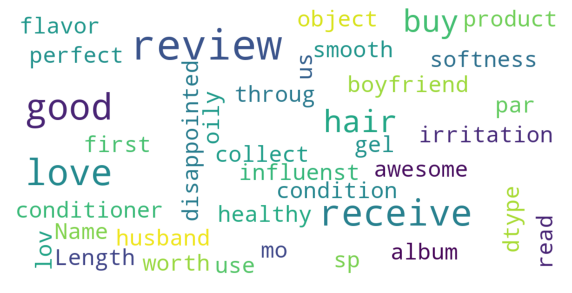

In [42]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_main['Review'])

## Task 3. Feature Extraction 

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#from sklearn.metrics import roc_curve, auc

In [44]:
#droping unnecessary columns
df_main=df_main[['Review','reviews_rating','user_sentiment']]
data=df_main
df_main

,Review,reviews_rating,user_sentiment
0,just awesome i love this album it very good mo...,5,Positive
1,good good flavor this review be collect as par...,5,Positive
3,disappointed i read through the review on here...,1,Negative
4,irritation my husband buy this gel for us the ...,1,Negative
5,not worth it my boyfriend and i buy this to sp...,1,Negative
...,...,...,...
29995,softness i get this conditioner with influenst...,5,Positive
29996,i love it i love it i receive this for review ...,5,Positive
29997,hair be so smooth after use first of all i lov...,5,Positive
29998,perfect for my oily hair i receive this throug...,5,Positive


In [45]:
# Lets have a look at the missing value for the column user sentiment
data[data['user_sentiment'].isna()]

,Review,reviews_rating,user_sentiment


**Good to save data**

In [46]:
# saving data for future purpose
import pickle as pickle
pickle.dump(data, open("data.pkl","wb"))

### **3.1 tfidf Vectorizer**

In [47]:
import pickle
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['Review'])
X = tfidf_vectorizer.transform(data['Review'])
y = data['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))


### 3.2 Train Test Split

In [48]:
# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [49]:
### Class Imbalance check and method to handle it
data.groupby(['user_sentiment']).count()

,Review,reviews_rating
user_sentiment,,
Negative,3058,3058
Positive,24547,24547


We have class imbalance problem here.
We will now deal with it using SMOTE based technique

### **3.3 Handling class imbalance using SMOTE technique**

In [50]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print("Before", counter)

#oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({'Positive': 18407, 'Negative': 2296})
After Counter({'Positive': 18407, 'Negative': 18407})


Now we have balanced data to work on

### Task 4. Model Building

1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes


In [51]:
# Importing required librarires
from scipy.spatial.distance import cosine

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

import time

In [57]:
# Importing Metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix

In [53]:
#### Creating a utility method for creating confusion matrix and displaying scores

def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)
    print('\n')
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

##  4.1 : Model 1 - Logistic Regression

In [54]:
# Values of inverse Regularization strength 
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sm, y_train_sm)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))
    print('\n')

Sensitivity for C = 0.01 is 0.8117263843648208
Specificity for C = 0.01 is 0.7572178477690289
Sensitivity for C = 0.05 is 0.8379478827361564
Specificity for C = 0.05 is 0.7572178477690289
Sensitivity for C = 0.25 is 0.8817589576547231
Specificity for C = 0.25 is 0.7309711286089239
Sensitivity for C = 0.5 is 0.9006514657980456
Specificity for C = 0.5 is 0.7139107611548556
Sensitivity for C = 1 is 0.9188925081433225
Specificity for C = 1 is 0.6732283464566929


for Inverse Regularization strength value of 0.25 the model is giving somewhat better result

In [55]:
final_lr = LogisticRegression(C=0.25)
final_lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.25)

LogisticRegression(C=0.25)


Accuracy is  0.8651115618661258
Sensitivity is 0.8817589576547231
Specificity is 0.7309711286089239


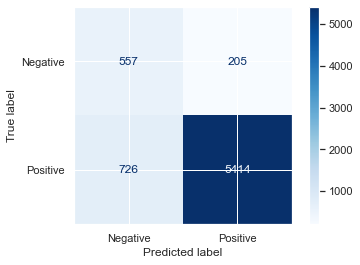

In [67]:
display_score(final_lr)

In [68]:
# saving the model
pickle.dump(final_lr, open('final_lr.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))

In [69]:
tfs=pd.read_pickle('tfidf.pkl')
mdl=pd.read_pickle('final_lr.pkl')

In [70]:
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr.coef_[0])
}

print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
print('\t')   
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 9.528991879874706)
('love', 7.361458208569277)
('good', 6.355730066197829)
('clean', 5.174425866864211)
('best', 4.916893406199895)
('easy', 4.497761686358117)
('more', 3.9548652155704267)
('awesome', 3.493810631481624)
('nice', 3.4517025779253876)
('and', 3.3245798910695235)
	
Negative Words
('bad', -4.872249283367734)
('not', -3.3339153565671764)
('evil', -3.2160983633653264)
('disappointed', -3.1559271887827114)
('horrible', -2.9535652790159452)
('resident', -2.7538055470346463)
('resident evil', -2.7053691022425057)
('like', -2.5329483889387907)
('terrible', -2.4157713065591104)
('cold', -2.3769291546545332)


## 4.2: Model 2 - Random Forest Classifier

In [71]:
#Fitting a Random Forest classifier without any hyperparameter tuning

rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

RandomForestClassifier()


Accuracy is  0.8906114169805853
Sensitivity is 0.9872964169381108
Specificity is 0.1115485564304462


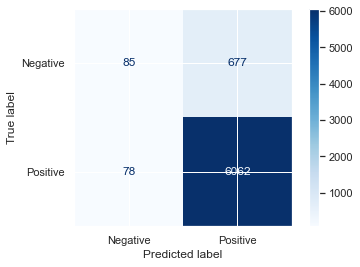

In [73]:
display_score(rf)

#### 4.4.1 Tuning random forest

In [74]:
##### Fitting a Random Forest classifier with various hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}

# Create a based model
final_rf = RandomForestClassifier()

# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = final_rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [75]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)
print("Best hyperparameters: ", rf_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8586235064538288
Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)


Accuracy is  0.7965807012460157
Sensitivity is 0.8522801302931596
Specificity is 0.34776902887139105


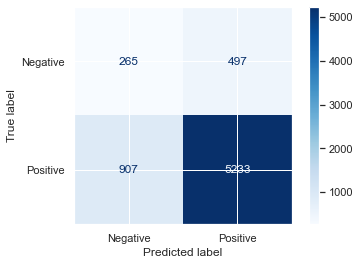

In [76]:
#Test data performance metrics
display_score(rf_tuned)

## 4.3 : Model 3 - Naive Bayes

In [77]:
# Fitting Naive Bayes Model
nb=MultinomialNB()

nb.fit(X_train_sm, y_train_sm)

MultinomialNB()

MultinomialNB()


Accuracy is  0.8606201101130108
Sensitivity is 0.8946254071661238
Specificity is 0.5866141732283464


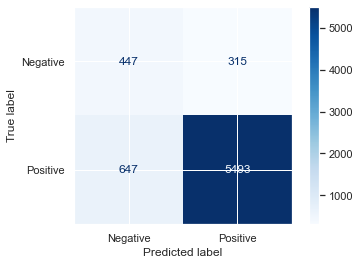

In [79]:
#Test Data Performance Metrics
display_score(nb)

## 4.4: Model 4 - XGBoost Classifier

In [80]:
#### Fitting a XGBoost classifier

xgb = XGBClassifier(booster='gbtree')
xgb.fit(X_train_sm, y_train_sm)

[15:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy is  0.8978556940017386
Sensitivity is 0.9522801302931596
Specificity is 0.45931758530183725


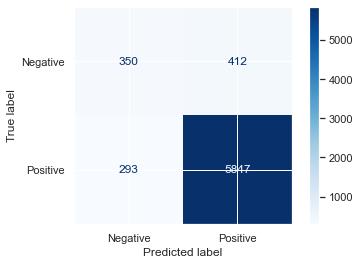

In [81]:
display_score(xgb)

#### 4.4.1 Tunig XGBoost

In [82]:
#### Fitting a XGBoost classifier with various custom hyperparameters.

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

final_xgb = XGBClassifier(booster='gbtree')

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[15:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:36]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

In [83]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8320357545486853
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

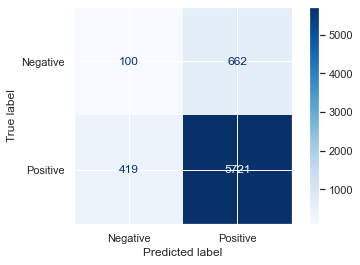

In [84]:
#### Displaying Confusion matrix Scores
# Test data performance metrics
display_score(xgb_tuned)

### 4.5 : Models Comparison

In [85]:
results = {('LR'):[0.865, 0.882, 0.731], ('NB'):[0.861, 0.894, 0.586], ('XGB'):[0.897, 0.952, 0.459], ('XGB Tuned'):[0.843, 0.931, 0.131],
 ('RF'):[0.891, 0.987, 0.111], ('RF Tuned'):[0.796, 0.852, 0.347]}
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity'])

,LR,NB,XGB,XGB Tuned,RF,RF Tuned
Accuracy,0.865,0.861,0.897,0.843,0.891,0.796
Sensitivity,0.882,0.894,0.952,0.931,0.987,0.852
Specificity,0.731,0.586,0.459,0.131,0.111,0.347


**Only Logistic Regression seems to perform well in classifying, so saving files for it**

In [86]:
import pickle
# Save the best trained model as a pickle string.
saved_model = pickle.dump(final_lr, open('logistic_regression.pkl', 'wb'))

## Task 5. Recommendation System 
- User based recommendation
- Item based recommendation

In [87]:
# Importing Libraries
from sklearn.metrics.pairwise import pairwise_distances

In [88]:
# Read the dataset 
recommendation_df = pd.read_csv("sample30.csv", sep=',')
recommendation_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [89]:
recommendation_df=recommendation_df[['id', 'reviews_rating', 'reviews_username']]


In [90]:
# Checking for null values
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [91]:
recommendation_df = recommendation_df[~recommendation_df.reviews_username.isna()]
recommendation_df.columns=['productId', 'rating', 'user']
recommendation_df.head()

,productId,rating,user
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


### 5.1 ; Dividing the dataset into train and test

In [92]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(recommendation_df, test_size=0.30, random_state=12)
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [93]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(0)

df_pivot.head(3)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.2 : Creating dummy train & dummy test dataset
These dataset will be used for prediction 
.

In [94]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

dummy_train.head()

,productId,rating,user
27729,AVpfRTh1ilAPnD_xYic2,5,stevieboy23
17120,AVpf9pzn1cnluZ0-uNTM,5,byo.kelly
22028,AVpfnRuSilAPnD_xfB8l,3,linda h
16308,AVpf63aJLJeJML43F__Q,5,cocoacrazy
19457,AVpfJP1C1cnluZ0-e3Xy,5,vanessavast


In [95]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [96]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(1)


dummy_train.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 5.3 : User Similarity Matrix

In [97]:
df_pivot.index.nunique()

18188

In [98]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [99]:
user_correlation.shape

(18188, 18188)

## 5.4 : Using adjusted Cosine 

In [100]:
# Create a user-product matrix.
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
)

In [101]:
df_pivot.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.5 : Normalising the rating of the products for each user around 0 mean

In [102]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [103]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
user_correlation.shape

(18188, 18188)

## 5.6 : Prediction - User

Doing the prediction for the users which are positively related with other users

In [105]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.93649167,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
user_predicted_ratings.shape

(18188, 251)

In [108]:
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.93649167,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [109]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


### 5.7 : Finding the top 20 recommendation for the *user*

In [110]:
user_final_rating

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
zyiah4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [111]:
# Take the user ID as input.
user_input = input("Enter your user name")

Enter your user namejoshua


In [112]:
user_final_rating.head(10)

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
00sab00,0.0,0.000000,0.000000,0.0,0.0,0.749669,0.0,0.944911,0.0,0.0,...,0.0,0.0,0.0,1.597933,0.0,0.0,0.0,0.0,1.936492,0.204124
01impala,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02dakota,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
02deuce,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
08dallas,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1.11E+24,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
10ten,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
11111111aaaaaaaaaaaaaaaaa,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [113]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

productId
AVpfPaoqLJeJML435Xk9    7.094184
AVpe59io1cnluZ0-ZgDU    6.019073
AVpf3VOfilAPnD_xjpun    5.328640
AVpe41TqilAPnD_xQH3d    5.201405
AVpf0eb2LJeJML43EVSt    4.699691
AVpf385g1cnluZ0-s0_t    3.836919
AVpf5olc1cnluZ0-tPrO    3.796958
AVpfRTh1ilAPnD_xYic2    3.784849
AVpfR5m0LJeJML436K3W    3.522614
AVpf5Z1zLJeJML43FpB-    3.263956
AVpfAgSp1cnluZ0-b2-K    3.077287
AVpfDA6wilAPnD_xTxdg    3.077287
AVpe4hlXLJeJML43xbrB    2.350317
AVpe8gsILJeJML43y6Ed    2.350317
AVpfrFDZLJeJML43Bmv0    2.350317
AV1l8zRZvKc47QAVhnAv    1.279204
AVpfM_ytilAPnD_xXIJb    0.861570
AVpfov9TLJeJML43A7B0    0.599335
AVpf5CnILJeJML43FjaU    0.572962
AVpfs0tUilAPnD_xgqN2    0.572962
Name: joshua, dtype: float64

### Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID. In the user based similarity, we had taken mean for each user instead of each products. 

In [114]:
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).T

df_pivot.head()

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the products rating for each products for using the Adujsted Cosine

In [115]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

user,00dog3,00sab00,01impala,02dakota,02deuce,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1234,...,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zyiah4,zzdiane,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [116]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
print(item_correlation.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(251, 251)


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [117]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Prediction - Item Item

In [118]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00666715, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00693369],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00554695]])

In [119]:
item_predicted_ratings.shape

(18188, 251)

In [120]:
dummy_train.shape

(18188, 251)

### Filtering the rating only for the products not rated by the user for recommendation

In [121]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

productId,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.006364,0.0,0.000000,...,0.0,0.014313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.006667,0.0,0.0,0.0,0.0,0.004563,0.000000,0.0,0.000896,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.011112,0.0,0.0,0.0,0.0,0.007606,0.000000,0.0,0.001493,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.008890,0.0,0.0,0.0,0.0,0.006084,0.000000,0.0,0.001195,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding the top 20 recommendation for the *user*

In [122]:
# Take the user ID as input
user_input = input("Enter your user name : ")

Enter your user name : joshua


In [123]:
user_input

'joshua'

In [124]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

productId
AVpf0pfrilAPnD_xi6s_    0.269356
AVpf5olc1cnluZ0-tPrO    0.081781
AVpfm8yiLJeJML43AYyu    0.068395
AVpfUJu_ilAPnD_xZdDr    0.038961
AVpf0thK1cnluZ0-r8vR    0.027536
AVpe8gsILJeJML43y6Ed    0.026218
AVpfBO2vLJeJML430mGh    0.024337
AVpe_N91LJeJML43z4jD    0.024146
AVpfM_ytilAPnD_xXIJb    0.021981
AVpe7sl91cnluZ0-aI1Y    0.021591
AVpfR5m0LJeJML436K3W    0.019096
AVpe6n2_LJeJML43yOgE    0.017029
AVpfMpZ51cnluZ0-f_L9    0.016266
AVpfOIrkilAPnD_xXgDG    0.015915
AVpe7zdzLJeJML43yp3d    0.015853
AVpe8xjUilAPnD_xRkxC    0.013941
AVpf0eb2LJeJML43EVSt    0.011749
AVpfov9TLJeJML43A7B0    0.011631
AVpf7LysilAPnD_xkm9G    0.011052
AVpfazX31cnluZ0-kbdl    0.010794
Name: joshua, dtype: float64

## Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user. 

In [126]:
test.columns

Index(['productId', 'rating', 'user'], dtype='object')

In [127]:
common =  test[test.productId.isin(train.productId)]
common.shape

(8962, 3)

In [128]:
common.head(4)

,productId,rating,user
19513,AVpfJP1C1cnluZ0-e3Xy,5,kanderson927
12599,AVpf3VOfilAPnD_xjpun,5,arib
1587,AVpe31o71cnluZ0-YrSD,4,karv
15380,AVpf5FF71cnluZ0-tHAV,5,xxacw12xx


In [129]:
common_item_based_matrix = common.pivot_table(index='user', columns='productId', values='rating').T

In [130]:
common_item_based_matrix.shape

(199, 8383)

In [131]:
item_correlation_df = pd.DataFrame(item_correlation)

In [132]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
item_correlation_df['productId'] = df_subtracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
list_name = common.productId.tolist()

In [135]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [136]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [137]:
item_correlation_df_3.head()

,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
productId,,,,,,,,,,,,,,,,,,,,,
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037657,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066184,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07508529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00693369, 0.00693369, 0.01091379, ..., 0.        , 0.00693369,
        0.00277348]])

In [139]:
common_item_predicted_ratings.shape

(199, 8383)

### We have used both the model User and Item based , and predicted - evaluated both

**Now saving file for User based**

In [125]:
# saving the model
pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))